$\Huge{\text{Linear Regression}}$

In this session, we shall learn about the basic concepts of linear regression. 

Let us first consider a sample data, which will be useful for our study. 

In [5]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us consider some open source data sets available in the internet. 
The first data set measures the mathscores of humans who have some drug concentration in their body. 


In [6]:
#Let us explore the data and the description 

#Get the data from the web 
drug_vs_mathscore_data = pd.read_csv('http://users.stat.ufl.edu/~winner/data/lsd.dat', delim_whitespace=True, index_col=False, header=None)

#print the first few rows of the data 
drug_vs_mathscore_data.head()


,0,1
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65


In [7]:
#if you wish to print the entire data, then use the following
drug_vs_mathscore_data


,0,1
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65
5,6.00,32.92
6,6.41,29.97


What do the numbers in the above data mean? Let us understand the data by seeing its description. 

In [8]:
import urllib.request  #this package is useful for accessing text files over internet 
drug_vs_mathscore_data_description_file = urllib.request.urlopen('http://users.stat.ufl.edu/~winner/data/lsd.txt')


for line in drug_vs_mathscore_data_description_file:
  decoded_line = line.decode("utf-8")
  print(decoded_line) 

Dataset:  lsd.dat

Source: Wagner, Agahajanian, and Bing (1968). Correlation of Performance

Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in

Human Subjects. Clinical Pharmacology and Therapeutics, Vol.9 pp635-638.



Description: Group of volunteers was given LSD, their mean scores on

math exam and tissue concentrations of LSD were obtained at n=7 time points.



Variables/Columns



Tissue Concentration    1-4

Math Score             8-12



Having known the data description, let us insert the descriptions into the data now.

In [9]:
drug_vs_mathscore_data.columns = ['Tissue concentration', 'Math score']


#check by printing the data again
drug_vs_mathscore_data.head()

,Tissue concentration,Math score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65


Seeing the data as mere numbers might not be interesting. So, let us use some graphical ways to visualize the data. 

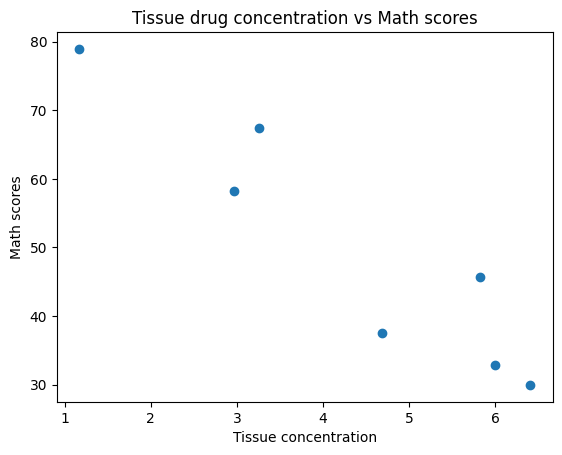

In [10]:
#We will plot a scatter plot of the math score vs tissue concentration 

plt.scatter(drug_vs_mathscore_data['Tissue concentration'], drug_vs_mathscore_data['Math score'])
#plt.scatter(drug_vs_mathscore_data.iloc[:,0], drug_vs_mathscore_data.iloc[:,1])
plt.title("Tissue drug concentration vs Math scores")
plt.xlabel("Tissue concentration")
plt.ylabel("Math scores")
plt.show()

We see that there is a negative trend in the data. That is, as the tissue drug concentration increases, the math score decreases. 

$\large{\text{Question:}}$ Is the trend linear (or) at least linear looking? 

$\large{\text{Another Question:}}$ What do we mean by a linear (or) linear looking trend between the two variables tissue concentration and math scores?  

In the next 2 figures, we shall illustrate the linear relationship between two variables $x$ and $y$ using a line. We assume $x$ to be independent (or) predictor variable and $y$ as the dependent (or) response variable.

$\large{\text{Linear relationship between }} x \text{ and } y \text{ captured by a straight line with positive slope }$.

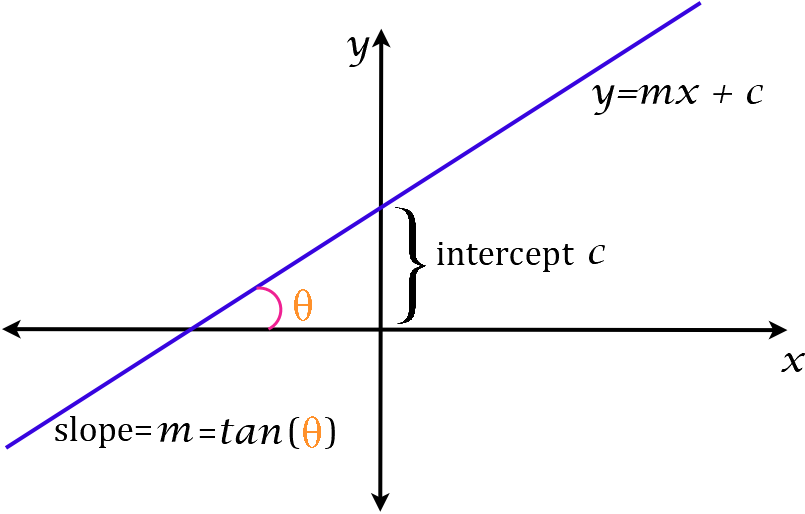

In [11]:
from urllib.request import urlopen
from PIL import Image

img = Image.open(urlopen('https://github.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/raw/main/images/line_pic.png'))
img

In this figure, we see that the line is represented by $y=mx+c$, where $m=\tan(\theta)$ is the slope of the line and $c$ is the intercept made on the $y$-axis. $\textbf{Note}$ that since $\theta$ is acute, the line has a positive slope. 

$\large{\text{Linear relationship between }} x \text{ and } y \text{ captured by a straight line with negative slope }$.

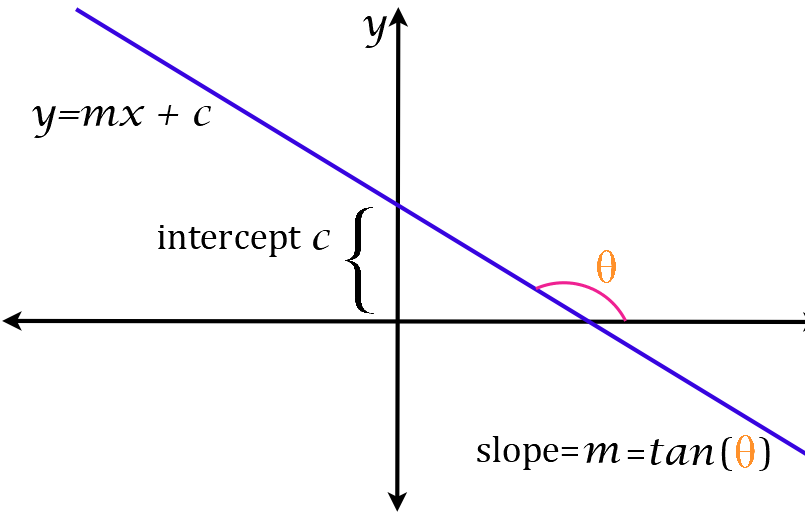

In [12]:
img_2 = Image.open(urlopen('https://github.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/raw/main/images/line_pic_neg_slope.png'))
img_2

In this figure too, we see that the line is represented by $y=mx+c$, where $m=\tan(\theta)$ is the slope of the line and $c$ is the intercept made on the $y$-axis. $\textbf{Note}$ that since $\theta$ is obtuse, the line has a negative slope. 

Hence when we look for $\large{\text{linear trend}}$ (or) $\large{\text{linear relationship}}$, we look for the relationship to be approximated by a straight line with a positive or negative slope. 

$\Large{\text{Probabilistic interpretation}}$ 

In probability terms, let us assume that $X$ and $Y$ are two real-valued random variables, where $Y$ denotes the response random variable and $X$ denotes the predictor random variable. 

Then we assume that the expected value of $Y$ given some observation of $X=x$ is represented as: 
$
E[Y|X=x] = \beta_1 x + \beta_0.
$.

However when we observe a data point $(x^i, y^i)$ as a realization of the pair $(X,Y)$, it is possible that the observed value $y^i$ of the response random variable $Y$ is not necessarily equal to the expected value $E[Y|X=x^i]=\beta_1 x^i + \beta_0$. 

In such case, we assume that the discrepancy between the observed value $y^i$ and the expected value $E[Y|X=x^i]$ is captured by an error $e^i$ given by:

$
\begin{align}
e^i &= y^i - E[Y|X=x^i] \\
\implies e^i&= y^i - (\beta_1 x^i + \beta_0). 
\end{align}
$ 



Now we can assume that the data set $D$ comprises multiple realizations of the random variable pair $(X,Y)$. 

Thus when we the data set $D$ contains $n$ observations of the form $\{(x^1,y^1), (x^2,y^2), \ldots, (x^n,y^n)\}$, then we can compute the errors as:
$\begin{align}
e^i = y^i - (\beta_1 x^i + \beta_0), \forall i \in \{1,2,\ldots,n\}.
\end{align}
$

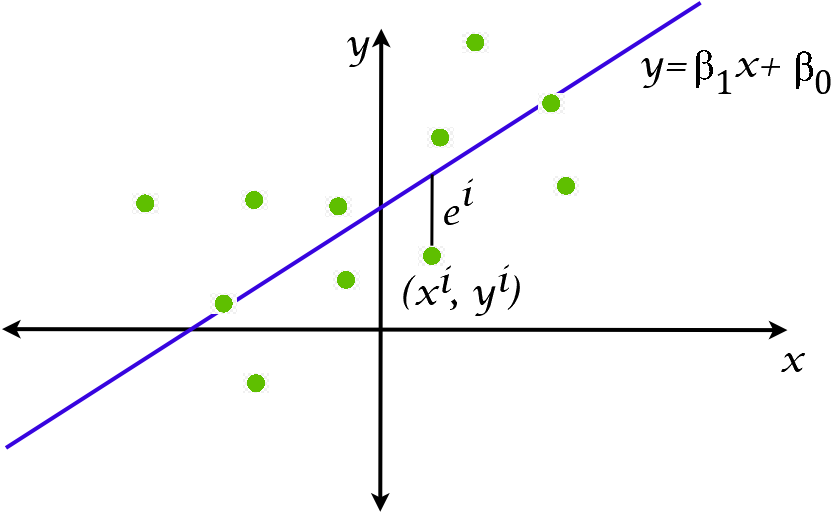

In [13]:
img_points_errors = Image.open(urlopen('https://github.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/raw/main/images/line_with_points_errors.png'))
img_points_errors

$\large{\text{How to estimate the parameters } \beta_1, \beta_0?}$ 

One way to estimate the values of $\beta_0, \beta_1$ is by minimizing the sum of squared errors given by: 
$
\begin{align}
\min \sum_{i=1}^{n} (e^i)^2 
\end{align}
$
which can be equivalently written as the following optimization problem:
$
\begin{align}
\min_{\beta_0, \beta_1} \sum_{i=1}^{n} [y^i - (\beta_1 x^i + \beta_0) ]^2. 
\end{align}
$

$\textbf{Note}$ that the optimization problem is called the ordinary least squares (OLS) problem, and the term $\sum_{i=1}^{n} [y^i - (\beta_1 x^i + \beta_0) ]^2$ is called the OLS objective function and we will denote the OLS objective by:

$
\begin{align}
L(\beta_0, \beta_1) = \sum_{i=1}^{n} [y^i - (\beta_1 x^i + \beta_0) ]^2. 
\end{align}
$ 

$\Large{\text{Solving the OLS optimization problem}}:$

Recall from calculus that to solve 

$
\begin{align}
\min_{\beta_0, \beta_1} L(\beta_0, \beta_1) = \sum_{i=1}^{n} [y^i - (\beta_1 x^i + \beta_0) ]^2. 
\end{align}
$, 
we find the partial derivatives with respect to $\beta_0, \beta_1$, and equate them to zero. Thus we would have:

$
\begin{align}
\frac{\partial }{\partial \beta_0} L(\beta_0, \beta_1) &= 0 \\
\implies \frac{\partial } {\partial \beta_0} \sum_{i=1}^{n} [y^i - (\beta_1 x^i + \beta_0) ]^2 &= 0 \\
\implies  -2 \sum_{i=1}^{n} [y^i - \beta_1 x^i - \beta_0 ] &= 0  \\
\implies \beta_0 n + \beta_1 \sum_{i=1}^{n} x^i &= \sum_{i=1}^{n} y^i. 
\end{align}
$, 

and 

$
\begin{align}
\frac{\partial }{\partial \beta_1} L(\beta_0, \beta_1) &= 0 \\
\implies \frac{\partial } {\partial \beta_1} \sum_{i=1}^{n} [y^i - (\beta_1 x^i + \beta_0) ]^2 &= 0 \\
\implies  -2 \sum_{i=1}^{n} x^i[y^i - \beta_1 x^i - \beta_0 ] &= 0  \\
\implies \beta_0 \sum_{i=1}^{n} x^i + \beta_1 \sum_{i=1}^{n} (x^i)^2 &= \sum_{i=1}^{n} x^i y^i. 
\end{align}
$.


Thus we have a system of 2 linear equations in $\beta_0, \beta_1$ given by:

$
\begin{align}
\beta_0 n + \beta_1 \sum_{i=1}^{n} x^i &= \sum_{i=1}^{n} y^i. \\
\beta_0 \sum_{i=1}^{n} x^i + \beta_1 \sum_{i=1}^{n} (x^i)^2 &= \sum_{i=1}^{n} x^i y^i. 
\end{align}
$.

This system of linear equations is called $\textbf{normal equations}$.

For solving the normal equations to find $\beta_1$, we can multiply the first equation by $\sum_{i=1}^{n} x^i$ and the second equation by $n$ and subtract to get:

$
\begin{align}
\beta_1 \left ( (\sum_{i=1}^{n}x^i)^2 - (n\sum_{i=1}^{n}(x^i)^2) \right ) & = (\sum_{i=1}^{n}x^i)(\sum_{i=1}^{n}y^i) - n (\sum_{i=1}^{n}x^iy^i) \\
\implies \beta_1 & = \frac{(n\sum_{i=1}^{n}x^iy^i)-(\sum_{i=1}^{n}x^i)(\sum_{i=1}^{n}y^i)}{n\sum_{i=1}^{n}(x^i)^2 - (\sum_{i=1}^{n}x^i)^2}
\end{align}
$

Denote the sample averages as: 
$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x^i$ and $\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y^i$. 

Using this, we can evaluate the denominator as follows:


$
\begin{align}
n\sum_{i=1}^{n}(x^i)^2 - (\sum_{i=1}^{n}x^i)^2 &= n\sum_{i=1}^{n}(x^i)^2- n^2 {\bar{x}}^2 \\
&=n\left [ \sum_{i=1}^{n}(x^i)^2 - n {\bar{x}}^2 \right ] \\
& = n\left [ \sum_{i=1}^{n}(x^i)^2 - n {\bar{x}}^2 + n {\bar{x}}^2 - n {\bar{x}}^2 \right ] \\ 
& \quad\quad \quad \quad \text{ (adding and subtracting } n{\bar{x}}^2 \text{ ) }  \\
&=  n\left [\sum_{i=1}^{n}(x^i)^2 -2n{\bar{x}}^2 + n{\bar{x}}^2 \right ] \\
&=  n\left [\sum_{i=1}^{n}(x^i)^2 -2 {\color{blue}{n\bar{x}}}\bar{x} + n{\bar{x}}^2 \right ] \\
&=  n\left [\sum_{i=1}^{n}(x^i)^2 -2\bar{x} {\color{blue}{\sum_{i=1}^{n} x^i}} + n{\bar{x}}^2 \right ] \\
&=  n\left [\sum_{i=1}^{n}(x^i)^2 -\sum_{i=1}^{n} 2x^i\bar{x} + \sum_{i=1}^{n}{\bar{x}}^2 \right ] \\
&=  n\left [\sum_{i=1}^{n} \left ( (x^i)^2 -2 x^i\bar{x} + {\bar{x}}^2 \right) \right ] \\
& \quad\quad \quad \quad \text{ (grouping the sums) } \\ 
&=  n\left [\sum_{i=1}^{n} \left (x^i-\bar{x}\right )^2\right ]
\end{align}
$

$\textbf{Exercise:}$ Show by a similar algebraic manipulation that the numerator evaluates to:

$
\begin{align}
(n\sum_{i=1}^{n}x^iy^i)-(\sum_{i=1}^{n}x^i)(\sum_{i=1}^{n}y^i) = n\sum_{i=1}^{n}(x^i-\bar{x})(y^i-\bar{y}).
\end{align}
$

Thus we have $\beta_1 = \frac{\sum_{i=1}^{n} (x^i-\bar{x})(y^i-\bar{y})}{\sum_{i=1}^{n} (x^i - \bar{x})^2}$.

$\textbf{Exercise:}$
Show that solving the normal equations system gives us the following estimates for $\beta_0$ and $\beta_1$: 

$\beta_0 = \bar{y} - \beta_1 \bar{x} \\
\beta_1 = \frac{\Sigma_{XY}}{\Sigma_{XX}}
$ 

where 

$
\begin{align}
\bar{x} &= \frac{1}{n} \sum_{i=1}^{n}x^i, \\
\bar{y} &= \frac{1}{n} \sum_{i=1}^{n}y^i, \\
\Sigma_{XX} &= \sum_{i=1}^{n} (x^i - \bar{x})^2 \\
\Sigma_{XY} &=  \sum_{i=1}^{n} (x^i - \bar{x})(y^i - \bar{y}) \\
\end{align}
$

$\Large{\text{Computing } \beta_0, \beta_1 \text{ for the Math Score vs Tissue Drug Concentration data set}}:$

In [14]:
#Let us now compute beta_0 and beta_1 from the math score vs tissue concentration data set
n = len(drug_vs_mathscore_data.index) #number of data points in the data set
print('number of data points in the data set:',n)

number of data points in the data set: 7


In [15]:
#First let us compute x_bar and y_bar 
x_bar = 0 
y_bar = 0

for i in range(n): #access each row from the data set 
  x_bar += float(drug_vs_mathscore_data.iat[i,0]) #access element at Tissue concentration column
  y_bar += float(drug_vs_mathscore_data.iat[i,1]) #access element at math scores column
x_bar /= n
y_bar /= n
print('x bar:',x_bar, 'y bar:',y_bar)

x bar: 4.332857142857143 y bar: 50.08714285714286


In [16]:
#Then we will compute Sigma_XX and Sigma_XY 
sigma_xx = 0
sigma_xy = 0

for i in range(n): #access each row from the data set 
  sigma_xx += (float(drug_vs_mathscore_data.iat[i,0]) - x_bar)**2 #computing (x^i - x_bar)^2 
  sigma_xy += (float(drug_vs_mathscore_data.iat[i,0]) - x_bar) * (float(drug_vs_mathscore_data.iat[i,1])-y_bar) #computing (x^i - x_bar)(y^i-y_bar)
print('sigma_xx:',sigma_xx, 'sigma_xy:',sigma_xy)

sigma_xx: 22.474942857142857 sigma_xy: -202.48724285714292


In [17]:
#Now we can compute beta_0 and beta_1
beta_1 = sigma_xy/sigma_xx
beta_0 = y_bar - beta_1* x_bar 

print('beta_0:', beta_0, 'beta_1', beta_1)


beta_0: 89.12387376799306 beta_1 -9.009466415296783


$\Large{\text{Plotting the regression line}}$
 
Having computed $\beta_0$ and $\beta_1$, we will now plot the line $y=\beta_1 x + \beta_0$ along with the points in the data set. 

In [18]:
#compute the left and right limits of the x-axis
x_min = 9999
x_max = -9999

for i in range(n): #access each row from the data set 
  x_i = float(drug_vs_mathscore_data.iat[i,0]) #access element at Tissue concentration column
  if x_i > x_max:
    x_max = x_i 
  if x_i < x_min:
    x_min = x_i

x_min = x_min - 1
x_max = x_max + 1 

print('x_min:',x_min,'x_max:',x_max)




x_min: 0.16999999999999993 x_max: 7.41


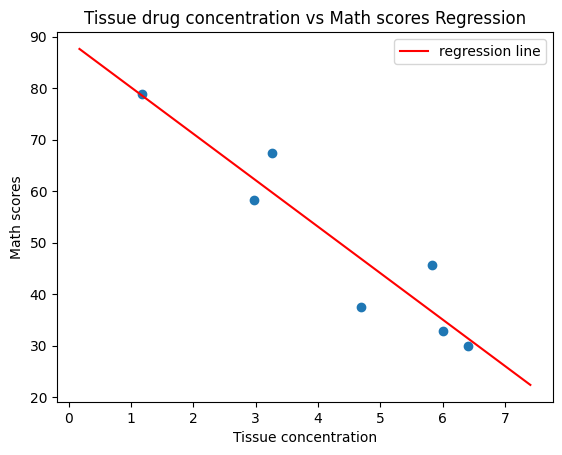

In [19]:
import numpy as np
x = np.linspace(x_min,x_max,100) #creates a series of points in x axis
y = beta_1*x+beta_0
plt.plot(x, y, '-r', label='regression line')
plt.scatter(drug_vs_mathscore_data['Tissue concentration'], drug_vs_mathscore_data['Math score'])

plt.title("Tissue drug concentration vs Math scores Regression")
plt.xlabel("Tissue concentration")
plt.ylabel("Math scores")
plt.legend(loc='upper right')
#plt.grid()
plt.show()

$\Large{\text{Residual Plot}}$

Sometimes it would be useful to plot the error (or) $\textbf{residual}$ $e^i$ versus the fitted values $\hat{y}^i=\beta_1 x^i + \beta_0$.  

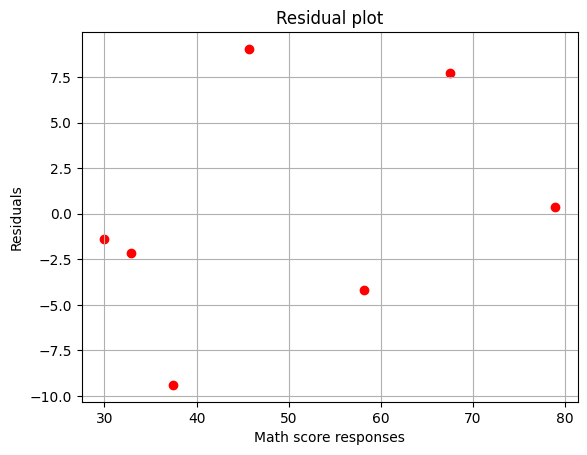

In [20]:
e_i_residuals_list = [] 
for i in range(n): #access each row from the data set 
  x_i = float(drug_vs_mathscore_data.iat[i,0]) #access element at Tissue concentration column
  y_i = float(drug_vs_mathscore_data.iat[i,1]) #access element at Math scores column

  y_pred_i = beta_1 * x_i + beta_0 #compute the prediction obtained using the regression coefficients 
  e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  e_i_residuals_list.append(e_i) #append the value of e_i to the list 

#plot the residuals e_i against the actual observations y_i
plt.scatter(drug_vs_mathscore_data['Math score'], e_i_residuals_list,color='r')
plt.title("Residual plot")
plt.xlabel("Math score responses")
plt.ylabel("Residuals")
plt.grid()
plt.show()

Note that the residual plot helps to check the variance in the errors $e^i$. 

$\Large{\text{Correlation between the variables}}$

It is useful to understand how the response variable is correlated with the predictor variable. 

One quantity useful to measure the correlation between the response variable and the predictor variable is the $\textbf{sample correlation}$ given by:

$
\begin{align}
\text{corr}(X,Y) = \frac{\Sigma_{XY}}{(n-1)s_X s_Y}
\end{align}
$
where 

$
\begin{align}
\text{recall } \Sigma_{XY} &= \sum_{i=1}^{n} (x^i - \bar{x}) (y^i - \bar{y}), \\
s_X &= \sqrt{\frac{1}{n-1} \Sigma_{XX} } = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x^i-\bar{x})^2 } \\
s_Y &= \sqrt{\frac{1}{n-1} \Sigma_{YY} } = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (y^i-\bar{y})^2 } 
\end{align}
$

$\text{Note}$ that $s_X$ and $s_Y$ are sample standard deviations of $X$ and $Y$ respectively. 

$\textbf{Exercise:}$ Verify that sample correlation can be equivalently written as

$
\begin{align}
\text{corr}(X,Y) = \frac{\Sigma_{XY}}{\sqrt{\Sigma_{XX}\Sigma_{YY}}}
\end{align}
$
where recall that: 

$
\begin{align}
\Sigma_{XX} &= \sum_{i=1}^{n} (x^i - \bar{x})^2 \\
\Sigma_{YY} &= \sum_{i=1}^{n} (y^i - \bar{y})^2
\end{align}
$. 

It is also known that $-1 \leq \text{corr}(X,Y) \leq 1$.


Let us now compute the sample correlation.

In [21]:
#Note that sigma_XY and sigma_XX have already been computed. 
#Hence we will now compute sigma_YY

#Also note that y_bar is computed before

sigma_yy = 0
for i in range(n): #access each row from the data set 
  y_i = float(drug_vs_mathscore_data.iat[i,1]) #access element at Math scores column
  sigma_yy += (y_i-y_bar)**2

print('sigma_yy:', sigma_yy)

#Then we will compute the sample correlation
sample_correlation = sigma_xy/(np.sqrt(sigma_xx * sigma_yy))
print('sample correlation:',sample_correlation)

sigma_yy: 2078.183342857143
sample correlation: -0.9369284768740831


$\textbf{Effect of standardization}$ 

Often it becomes useful to standardize the random variable realizations as:

${{x_{\star}^i}} = \frac{(x^i - \bar{x})}{S_X}$, ${{y_\star^i}} = \frac{(y^i - \bar{y})}{S_Y}$. 

Recall that

$
\begin{align}
\bar{x} &= \frac{1}{n} \sum_{i=1}^{n} x^i \\
\bar{y} &= \frac{1}{n} \sum_{i=1}^{n} x^i \\
S_X &= \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x^i - \bar{x})^2}, \\
S_Y &= \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (y^i - \bar{y})^2}.
\end{align}
$

By standardizing, we mean to represent each variable using units of standard deviation from its mean. 

$\textbf{Exercise:}$
If we use the linear regression model for these standardized variables, show that $\beta_0 = 0$ and $\beta_1 = \text{corr}(X,Y)$.

Hence the linear model obtained for standardized variables is of the form: $E[Y_\star|X_⋆=x_\star] = \beta_1 x_\star  = \text{corr}(X,Y) x_\star$. 

This indicates that the regression line passes through the origin and has slope $\beta_1 = \text{corr}(X,Y)$. 



$\Large{\text{Coefficient of multiple determination}}$ 

Consider the term 

$
\begin{align}
\Sigma_{YY} = \sum_{i=1}^{n} (y^i - \bar{y})^2. 
\end{align}
$
This term $\Sigma_{YY}$ measures the $\textbf{observed total variation of the response}$, without considering the effect of predictor variables. 

When we have access to a predictor variable, then the $\textbf{unexplained variation of response variable given the predictor variable}$ is given by the sum of squared residuals:

$
\begin{align}
L = \sum_{i=1}^{n} (e^i)^2. 
\end{align}
$

Define the term:

$
\begin{align}
\text{SSD} = \Sigma_{YY}- L
\end{align}
$

as the difference between observed total variation of the response and the unexplained variation given the predictor. Hence this can be considered as $\textbf{variability explained by the regression on the predictor variable}$ or $\textbf{fraction of variance explained by the regression on the predictor variable}$. 

Assuming $\Sigma_{YY}\neq 0$, consider: 

$
\begin{align}
\frac{\text{SSD}}{\Sigma_{YY}} = 1- \frac{L}{\Sigma_{YY}}.
\end{align}
$
Here the term $\frac{\text{SSD}}{\Sigma_{YY}}$ denotes the proportion of observed variability in the response variable which is explained by the regression on the predictor variable. From the equality, this proportion of observed variability given the predictor is simply $1$ minus the proportion of unexplained variability. 

This term $\frac{\text{SSD}}{\Sigma_{YY}}$ denoting the proportion of observed variability which is explained by the predictor variable has a special name called $\textbf{coefficient of multiple determination}$ and is denoted by $R^2$. 

It is known that $0\leq R^2 \leq 1$. 

Under some assumptions on the error $e^i$, it can be shown that $R^2 = (\text{corr}(X,Y))^2$.

Let us compute $R^2$  for the $\textbf{Math Score vs Tissue Drug Concentration data set}$. 

In [22]:
#Note that sum of squared residuals needs to be computed 

sum_sq_residuals = 0
for i in range(n): #access each row from the data set 
  x_i = float(drug_vs_mathscore_data.iat[i,0]) #access element at Tissue concentration column
  y_i = float(drug_vs_mathscore_data.iat[i,1]) #access element at Math scores column
  y_pred_i = beta_1*x_i + beta_0
  sum_sq_residuals += (y_i-y_pred_i)**2

print('sum of squared residuals:', sum_sq_residuals)

#Then we will compute the R^2 quantity
R_sq = 1.0-sum_sq_residuals/sigma_yy
print('R^2:',R_sq)

sum of squared residuals: 253.88132880967103
R^2: 0.8778349707775888


$\Large{\text{References:}}$



1.   Olive J. David, $\textit{Linear Regression}$. Springer International Publishing,  2017.
2.   Sanford Weisberg. $\textit{Applied Linear Regression}$. John Wiley $\&$ Sons, Inc., Hoboken, New Jersey, 4-th Edition, 2014.

